# A method to use the present_load to balance the leg of poppy

In [1]:
from poppy.creatures import PoppyHumanoid

poppy = PoppyHumanoid(simulator='vrep')

%pylab inline
#import time

Populating the interactive namespace from numpy and matplotlib


A trick to switch from real time to simulated time using time function (because my VREP is not in real time - about 3 times slower)

In [4]:
import time as real_time
class time:
    def __init__(self,robot):
        self.robot=robot
    def time(self):
        t_simu = self.robot.current_simulation_time
        return t_simu
    def sleep(self,t):
        t0 = self.robot.current_simulation_time
        while (self.robot.current_simulation_time - t0) < t-0.01:
            real_time.sleep(0.001)

time = time(poppy)
print time.time()
time.sleep(0.025) #0.025 is the minimum step according to the V-REP defined dt  
print time.time()

12.9749450684
12.9999446869


The present load of hip and ankle

In [3]:
print poppy.l_ankle_y.present_load
print poppy.r_ankle_y.present_load
print poppy.l_hip_y.present_load
print poppy.r_hip_y.present_load

-0.689390301704
0.0912166852504
-0.497044684986
0.131402056043


The present load function of time

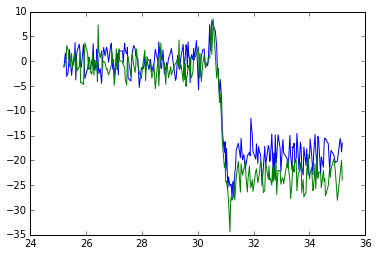

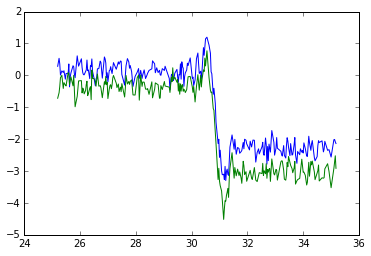

In [5]:
load_r = []
load_l = []
load1_r = []
load1_l = []
t = []
t0 = time.time()
while time.time()-t0 <5:
    t_simu = poppy.current_simulation_time
    time.sleep(0.01)
    if poppy.current_simulation_time != t_simu:
        
        load_r.append(poppy.r_ankle_y.present_load)
        load_l.append(poppy.l_ankle_y.present_load)
        load1_r.append(poppy.r_hip_y.present_load)
        load1_l.append(poppy.l_hip_y.present_load)
        t.append(poppy.current_simulation_time)
poppy.l_ankle_y.goto_position(-5, 1, wait=False)
poppy.r_ankle_y.goto_position(-5, 1, wait=False)
t0 = time.time()
while time.time()-t0 <5:
    t_simu = poppy.current_simulation_time
    time.sleep(0.01)
    if poppy.current_simulation_time != t_simu:
        
        load_r.append(poppy.r_ankle_y.present_load)
        load_l.append(poppy.l_ankle_y.present_load)
        load1_r.append(poppy.r_hip_y.present_load)
        load1_l.append(poppy.l_hip_y.present_load)
        t.append(poppy.current_simulation_time)
poppy.l_ankle_y.goto_position(0, 1, wait=False)
poppy.r_ankle_y.goto_position(0, 1, wait=True)   
        
        
figure(1)            
plot(t,load_r)
plot(t,load_l)
figure(2)
plot(t,load1_r)
plot(t,load1_l)


Integration of different present_load to have a more stable value.

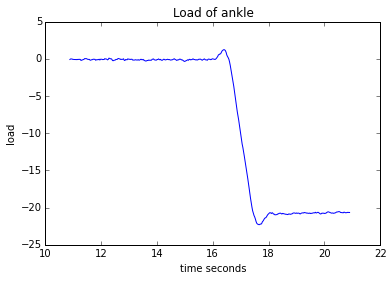

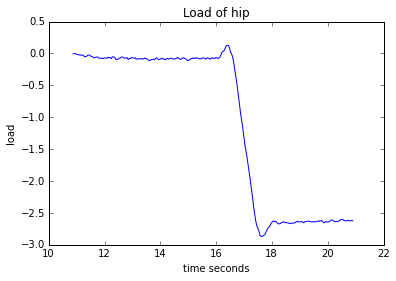

In [3]:
class load:
    def __init__(self,nb_record=10):
        self.record_pos=[]
        i=0
        while i<nb_record:
            self.record_pos.insert(0,[0,0])
            i+=1
            
    def add_load(self,l):
        size = len(self.record_pos)
        self.record_pos.insert(0,l)
        del self.record_pos[size]
        
    
    def sum_load(self):
        integrate = 0
        nb = 0
        for i in self.record_pos:
            s = i[0]+i[1]
            nb += 2 
            integrate += float(s)
        return integrate/nb
    
graph_load_ankle = []
graph_load_hip = []
graph_t = []

load_ankle = load(40)
load_hip = load(40)


t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)

poppy.l_ankle_y.goto_position(-5, 1, wait=False)
poppy.r_ankle_y.goto_position(-5, 1, wait=False)

t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)

poppy.l_ankle_y.goto_position(0, 1, wait=False)
poppy.r_ankle_y.goto_position(0, 1, wait=True)   
        
figure(1)            
plot(graph_t,graph_load_ankle)
xlabel('time seconds')
ylabel('load')
title ('Load of ankle')
figure(2)
plot(graph_t,graph_load_hip)
xlabel('time seconds')
ylabel('load')
title ('Load of hip')

Load of ankle and hip during a knee movement

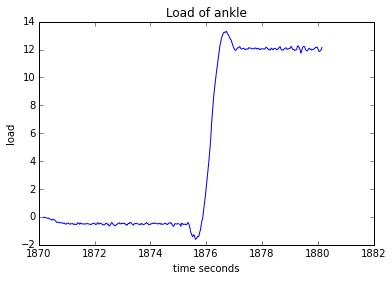

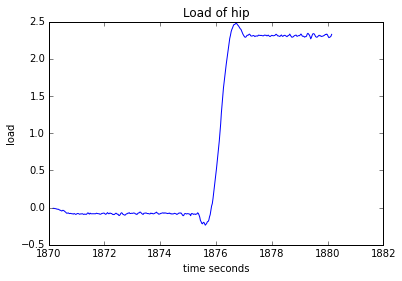

In [33]:
graph_load_ankle = []
graph_load_hip = []
graph_t = []

load_ankle = load(30)
load_hip = load(30)


t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)

poppy.l_knee_y.goto_position(5, 1, wait=False)
poppy.r_knee_y.goto_position(5, 1, wait=False)


t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)

poppy.l_knee_y.goto_position(0, 1, wait=False)
poppy.r_knee_y.goto_position(0, 1, wait=False)

        
figure(1)            
plot(graph_t,graph_load_ankle)
xlabel('time seconds')
ylabel('load')
title ('Load of ankle')
figure(2)
plot(graph_t,graph_load_hip)
xlabel('time seconds')
ylabel('load')
title ('Load of hip')

On the previous graph, you can see the two forces in action during a movement. First, an inertia force due to the acceleration of the body. This force decrease the load of the motor for a short time and this force is in the opposite direction of the move. After, the load increase because the gravity center of poppy is moved behind poppy (in direction of the back of poppy). So, when poppy is balanced with his gravity center just above his feet, the load of the hip and ankle motors should be closed to zero.

Now, we are going to apply a very simple correction to maintien the load of ankle closed to zero.

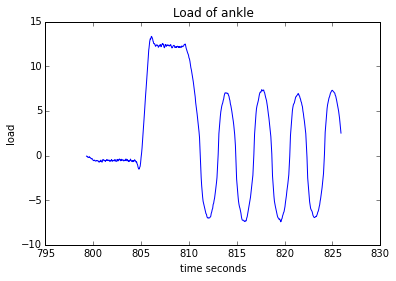

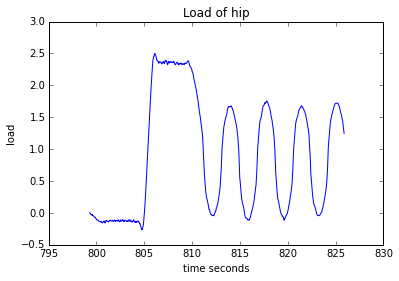

In [15]:
graph_load_ankle = []
graph_load_hip = []
graph_t = []

load_ankle = load(40)
load_hip = load(40)

t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)

poppy.l_knee_y.goto_position(5, 1, wait=False)
poppy.r_knee_y.goto_position(5, 1, wait=False)


t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)
  
        
t0 = time.time()
while time.time()-t0 <15:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
        
    r_ankle_y_pos = poppy.r_ankle_y.present_position
    l_ankle_y_pos = poppy.l_ankle_y.present_position    
    
    if load_ankle.sum_load() > 2:
        while load_ankle.sum_load() > 2:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            r_ankle_y_pos -= 0.15
            l_ankle_y_pos -= 0.15
            #print "load :",load_ankle.sum_load()
            #print "correction négative :",r_ankle_y_pos, l_ankle_y_pos
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = l_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    
    elif load_ankle.sum_load() < -2: 
        while load_ankle.sum_load() < -2:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            
            r_ankle_y_pos += 0.15
            l_ankle_y_pos += 0.15
            #print "load :",load_ankle.sum_load()
            #print "correction positive :",r_ankle_y_pos, l_ankle_y_pos
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = r_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    else :
        
        graph_load_ankle.append(load_ankle.sum_load())
        graph_load_hip.append(load_hip.sum_load())
        graph_t.append(poppy.current_simulation_time)
        
        #print "poppy is balanced"
        time.sleep(0.025)
        
poppy.l_ankle_y.goto_position(0, 1, wait=False)
poppy.r_ankle_y.goto_position(0, 1, wait=False)

poppy.l_knee_y.goto_position(0, 1, wait=False)
poppy.r_knee_y.goto_position(0, 1, wait=True)   
        
figure(1)            
plot(graph_t,graph_load_ankle)
xlabel('time seconds')
ylabel('load')
title ('Load of ankle')
figure(2)
plot(graph_t,graph_load_hip)
xlabel('time seconds')
ylabel('load')
title ('Load of hip')


The system is oscilating for two reasons :
* The correction have an action on the sensor. That means the correction movement create an inertia force which stop when the movement stop so the correction is two big when the movement stop and the movement restart on the other sens.
* There is a delay between the action of the correction and the action on the sensor.

What is possible to do to avoid the oscilation ? To **introduce a proportional correction** is better because the more close to the goal you are, the less correction you need.

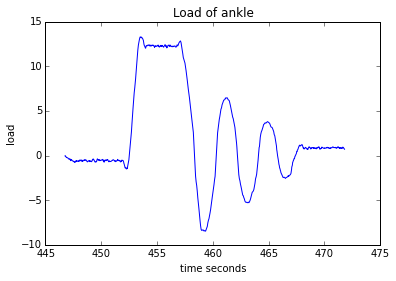

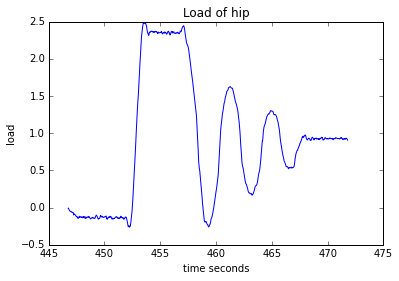

In [5]:
graph_load_ankle = []
graph_load_hip = []
graph_t = []

load_ankle = load(40)
load_hip = load(40)

t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)

poppy.l_knee_y.goto_position(5, 1, wait=False)
poppy.r_knee_y.goto_position(5, 1, wait=False)


t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)
  
        
t0 = time.time()
while time.time()-t0 <15:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
        
    r_ankle_y_pos = poppy.r_ankle_y.present_position
    l_ankle_y_pos = poppy.l_ankle_y.present_position    
    
    if load_ankle.sum_load() > 2:
        while load_ankle.sum_load() > 2:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            r_ankle_y_pos -= 0.02*abs(load_ankle.sum_load())
            l_ankle_y_pos -= 0.02*abs(load_ankle.sum_load())
            #print "load :",load_ankle.sum_load()
            #print "correction négative :",r_ankle_y_pos, l_ankle_y_pos
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = l_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    
    elif load_ankle.sum_load() < -2: 
        while load_ankle.sum_load() < -2:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            
            r_ankle_y_pos += 0.02*abs(load_ankle.sum_load())
            l_ankle_y_pos += 0.02*abs(load_ankle.sum_load())
            #print "load :",load_ankle.sum_load()
            #print "correction positive :",r_ankle_y_pos, l_ankle_y_pos
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = r_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    else :
        
        graph_load_ankle.append(load_ankle.sum_load())
        graph_load_hip.append(load_hip.sum_load())
        graph_t.append(poppy.current_simulation_time)
        
        #print "poppy is balanced"
        time.sleep(0.025)
        
poppy.l_ankle_y.goto_position(0, 1, wait=False)
poppy.r_ankle_y.goto_position(0, 1, wait=False)

poppy.l_knee_y.goto_position(0, 1, wait=False)
poppy.r_knee_y.goto_position(0, 1, wait=True)   
        
figure(1)            
plot(graph_t,graph_load_ankle)
xlabel('time seconds')
ylabel('load')
title ('Load of ankle')
figure(2)
plot(graph_t,graph_load_hip)
xlabel('time seconds')
ylabel('load')
title ('Load of hip')


In [17]:
poppy.l_ankle_y.goto_position(0, 1, wait=False)
poppy.r_ankle_y.goto_position(0, 1, wait=False)

poppy.l_knee_y.goto_position(0, 1, wait=False)
poppy.r_knee_y.goto_position(0, 1, wait=True)  

The system stabilises after few oscillations. What is possible now is to introduce a derivated parameter.

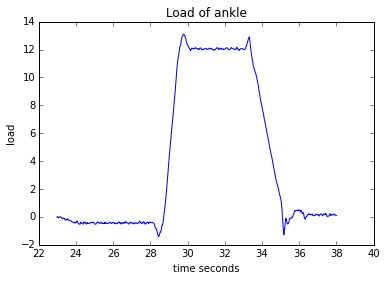

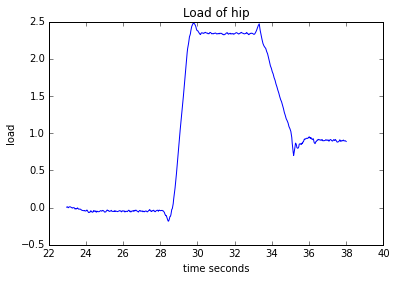

In [21]:
class load:
    def __init__(self,nb_record=10):
        self.record_pos=[]
        i=0
        while i<nb_record:
            self.record_pos.insert(0,[0,0])
            i+=1
            
    def add_load(self,l):
        size = len(self.record_pos)
        self.record_pos.insert(0,l)
        del self.record_pos[size]
        
    
    def sum_load(self):
        integrate = 0
        nb = 0
        for i in self.record_pos:
            s = i[0]+i[1]
            nb += 2 
            integrate += float(s)
        return integrate/nb
    
    def d_sum_load(self):
        integrate = 0
        lg = len(self.record_pos)
        for i in range(1, lg-2):
            s =self.record_pos[i][0]+self.record_pos[i][1]
            integrate += float(s)
        integrate1 = (integrate + self.record_pos[0][0] + self.record_pos[0][1])/(lg*2)
        integrate0 = (integrate + self.record_pos[lg-1][0] + self.record_pos[lg-1][1])/(lg*2)
        d_sum_load = integrate1-integrate0
        return d_sum_load
        


graph_load_ankle = []
graph_load_hip = []
graph_t = []

load_ankle = load(40)
load_hip = load(40)

t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)

poppy.l_knee_y.goto_position(5, 1, wait=False)
poppy.r_knee_y.goto_position(5, 1, wait=False)


t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
                 
    graph_load_ankle.append(load_ankle.sum_load())
    graph_load_hip.append(load_hip.sum_load())
    graph_t.append(poppy.current_simulation_time)
    
    time.sleep(0.025)
  
        
t0 = time.time()
while time.time()-t0 <5:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
        
    r_ankle_y_pos = poppy.r_ankle_y.present_position
    l_ankle_y_pos = poppy.l_ankle_y.present_position    
    
    if load_ankle.sum_load() > 1:
        while load_ankle.sum_load() > 1:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            r_ankle_y_pos -= 0.02*abs(load_ankle.sum_load())
            r_ankle_y_pos -= 0.3*load_ankle.d_sum_load()
            l_ankle_y_pos -= 0.02*abs(load_ankle.sum_load())
            l_ankle_y_pos -= 0.3*load_ankle.d_sum_load()
            #print "load :",load_ankle.sum_load()
            #print "correction négative :",r_ankle_y_pos, l_ankle_y_pos
            #print "d_load",load_ankle.d_sum_load()
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = l_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    
    elif load_ankle.sum_load() < -1: 
        while load_ankle.sum_load() < -1:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            
            r_ankle_y_pos += 0.02*abs(load_ankle.sum_load())
            r_ankle_y_pos -= 0.3*load_ankle.d_sum_load()
            l_ankle_y_pos += 0.02*abs(load_ankle.sum_load())
            l_ankle_y_pos -= 0.3*load_ankle.d_sum_load()
            #print "load :",load_ankle.sum_load()
            #print "correction positive :",r_ankle_y_pos, l_ankle_y_pos
            #print "d_load",load_ankle.d_sum_load()
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = r_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    else :
        
        graph_load_ankle.append(load_ankle.sum_load())
        graph_load_hip.append(load_hip.sum_load())
        graph_t.append(poppy.current_simulation_time)
        
        #print "poppy is balanced"
        time.sleep(0.025)
        
poppy.l_ankle_y.goto_position(0, 1, wait=False)
poppy.r_ankle_y.goto_position(0, 1, wait=False)

poppy.l_knee_y.goto_position(0, 1, wait=False)
poppy.r_knee_y.goto_position(0, 1, wait=True)   
        
figure(1)            
plot(graph_t,graph_load_ankle)
xlabel('time seconds')
ylabel('load')
title ('Load of ankle')
figure(2)
plot(graph_t,graph_load_hip)
xlabel('time seconds')
ylabel('load')
title ('Load of hip')


The correction is now more efficient. The correction is a kind of PID controller, if you like the theory and mathematics, more explanations [here](http://en.wikipedia.org/wiki/PID_controller).

Now, we want to correct the balance when the knee are moving.

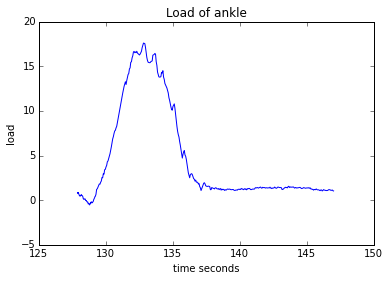

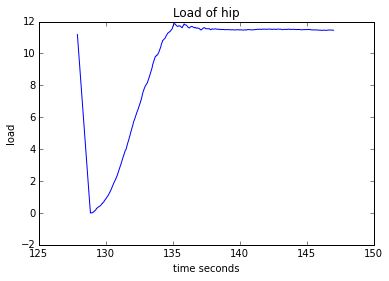

In [52]:
time.sleep(1)
graph_load_ankle = []
graph_load_hip = []
graph_t = []

poppy.l_knee_y.goto_position(70, 8, wait=False)
poppy.r_knee_y.goto_position(70, 8, wait=False)


t0 = time.time()
while time.time()-t0 <10:
    load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
    load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
        
    r_ankle_y_pos = poppy.r_ankle_y.present_position
    l_ankle_y_pos = poppy.l_ankle_y.present_position    
    
    if load_ankle.sum_load() > 1:
        while load_ankle.sum_load() > 1:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            r_ankle_y_pos -= 0.03*abs(load_ankle.sum_load())
            r_ankle_y_pos -= 0.4*load_ankle.d_sum_load()
            l_ankle_y_pos -= 0.03*abs(load_ankle.sum_load())
            l_ankle_y_pos -= 0.4*load_ankle.d_sum_load()
            #print "load :",load_ankle.sum_load()
            #print "correction négative :",r_ankle_y_pos, l_ankle_y_pos
            #print "d_load",load_ankle.d_sum_load()
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = l_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    
    elif load_ankle.sum_load() < -1: 
        while load_ankle.sum_load() < -1:
            
            graph_load_ankle.append(load_ankle.sum_load())
            graph_load_hip.append(load_hip.sum_load())
            graph_t.append(poppy.current_simulation_time)
            
            
            r_ankle_y_pos += 0.03*abs(load_ankle.sum_load())
            r_ankle_y_pos -= 0.4*load_ankle.d_sum_load()
            l_ankle_y_pos += 0.03*abs(load_ankle.sum_load())
            l_ankle_y_pos -= 0.4*load_ankle.d_sum_load()
            #print "load :",load_ankle.sum_load()
            #print "correction positive :",r_ankle_y_pos, l_ankle_y_pos
            #print "d_load",load_ankle.d_sum_load()
            poppy.r_ankle_y.goal_position = r_ankle_y_pos
            poppy.l_ankle_y.goal_position = r_ankle_y_pos
            time.sleep(0.05) # waiting for the movement to finish - according to the dt minimum define in VREP
            load_ankle.add_load([poppy.r_ankle_y.present_load,poppy.l_ankle_y.present_load])
            load_hip.add_load([poppy.r_hip_y.present_load,poppy.l_hip_y.present_load])
    else :
        
        graph_load_ankle.append(load_ankle.sum_load())
        graph_load_hip.append(load_hip.sum_load())
        graph_t.append(poppy.current_simulation_time)
        
        #print "poppy is balanced"
        time.sleep(0.025)
        
poppy.l_ankle_y.goto_position(0, 1, wait=False)
poppy.r_ankle_y.goto_position(0, 1, wait=False)

poppy.l_knee_y.goto_position(0, 1, wait=False)
poppy.r_knee_y.goto_position(0, 1, wait=True)   
        
figure(1)            
plot(graph_t,graph_load_ankle)
xlabel('time seconds')
ylabel('load')
title ('Load of ankle')
figure(2)
plot(graph_t,graph_load_hip)
xlabel('time seconds')
ylabel('load')
title ('Load of hip')